# General Assembly Python Programming Assignment2.
# Grocery Sales Data Analysis.
# Submitted by Uma Tuteja on 28/11/2023.



#Grocery Sales Data : Data Analysis using Pandas and Python Libraries.

---



In [39]:
# Import libraries.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets.

sales = pd.read_csv('sales.csv')
item_master = pd.read_csv('item_master.csv')
sales_rep = pd.read_csv('sales_rep.csv')
customers = pd.read_csv('customers.csv', encoding='latin-1')
cities = pd.read_csv('cities.csv', encoding='latin-1')

# Rename '%KEY' column to 'Percent_KEY' in sales DataFrame.
sales.rename(columns={'%KEY': 'Percent_KEY'}, inplace=True)

# Rename 'Sales Rep ID' column to 'Sales Rep Number' in sales_rep DataFrame.
sales_rep.rename(columns={'Sales Rep ID': 'Sales Rep Number'}, inplace=True)


#1. Sales Data EDA ( Exploratory Data Analysis).

In [40]:
# Sales Data Exploratory Data Analysis (EDA).

# 1.Checking the top rows of the sales data.
print(sales.head())


   Percent_KEY    Cost  Customer Number       Date  GrossSales Invoice Date  \
0         3428 -513.15         10012226  1/12/2012   -573.3835    1/12/2012   
1         3429 -105.93         10012226  1/12/2012   -204.6638    1/12/2012   
2         3430  -88.07         10012226  1/12/2012   -165.8016    1/12/2012   
3         3431  -43.12         10012226  1/12/2012   -118.3703    1/12/2012   
4         3432  -37.98         10012226  1/12/2012   -102.3319    1/12/2012   

   Invoice Number                   Item Desc  Item Number  Margin  \
0          318960     Cutting Edge Sliced Ham        10696  -37.29   
1          318960  Washington Cranberry Juice        10009  -90.54   
2          318960             Moms Sliced Ham        10385  -71.10   
3          318960                 Tip Top Lox        10215  -70.52   
4          318960        Just Right Beef Soup        10965  -60.26   

   Order Number Promised Delivery Date   Sales  Sales Qty  Sales Rep Number  
0        115785           

# 2.Checking the structure of the sales data.

In [41]:
# 2.Checking the structure of the sales data.

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96466 entries, 0 to 96465
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Percent_KEY             96466 non-null  int64  
 1   Cost                    96466 non-null  float64
 2   Customer Number         96466 non-null  int64  
 3   Date                    96466 non-null  object 
 4   GrossSales              96466 non-null  float64
 5   Invoice Date            96466 non-null  object 
 6   Invoice Number          96466 non-null  int64  
 7   Item Desc               96466 non-null  object 
 8   Item Number             96466 non-null  int64  
 9   Margin                  96466 non-null  float64
 10  Order Number            96466 non-null  int64  
 11  Promised Delivery Date  96466 non-null  object 
 12  Sales                   96466 non-null  float64
 13  Sales Qty               96466 non-null  float64
 14  Sales Rep Number        96466 non-null

Insights:

By looking at the top rows of Sales data and its structure we can say that there are 15 columns and 96466 rows in Sales data.
*   Date, Invoice Date, Promised Delivery Date, and Item Desc have string datatype.
*   6 columns are int64(6) datatype and 5 columns are float64(5) datatype.
*   Memory usage for Sales data is 11.0+ MB.
*   All the columns values are non-null.







# 3. Summary statistics of numerical columns.

In [42]:
# 3. Summary statistics of numerical columns.

print(sales.describe())

         Percent_KEY           Cost  Customer Number     GrossSales  \
count   96466.000000   96466.000000     9.646600e+04   96466.000000   
mean    54715.166732     638.272186     1.001751e+07    1097.916246   
std     32130.384196    6435.093413     7.360265e+03   10243.399673   
min         1.000000   -9392.930000     1.000000e+07  -27929.875200   
25%     26793.250000      13.280000     1.001242e+07      33.241525   
50%     54144.500000      55.460000     1.001942e+07     114.010000   
75%     82704.750000     180.540000     1.002352e+07     328.581400   
max    110409.000000  366576.000000     1.002758e+07  539200.000000   

       Invoice Number   Item Number         Margin   Order Number  \
count    96466.000000  96466.000000   96466.000000   96466.000000   
mean    213089.625339  10512.149856     448.377554  193854.617637   
std      90626.900031    292.454663    3848.809989   73985.562829   
min     100001.000000  10001.000000  -27929.880000  100012.000000   
25%     118843.

#Insights:

By looking at Sales data Summary statistics.

1. For the %KEY, its value ranges from 1 to 110409, indicating a unique identifier for each entry in the dataset.

2. For Cost, GrossSales, Margin, Sales, Sales Qty data:

  2a. Mean and Standard Deviation:
      * Cost: mean around 638 with a high standard deviation  
        of approx 6435.
      * GrossSales: mean around 1097 with a high standard deviation  
        of approx 10243.
      * Margin: mean around 448 with a high standard deviation  
        of approx 3848.
      * Sales: mean around 1086 with a high standard deviation of
        of approx 10147.
      * Sales Qty: mean around 18.83 with a high standard deviation of
        approx 293.56.

   Note : The high standard deviations relative to their means suggest substantial variability or outliers because of few transactions with significantly higher/lower values in the data influencing overall performance analysis.

  2b. Minimum and Maximum Values: There are negative Minimum values in Cost,
      GrossSales, Margin, Sales,Sales Qty data.

      * Cost: ranges from -9392 to 366576.
      * GrossSales: ranges from -27929 to 539200.
      * Margin: ranges from -27929 to 202083.
      * Sales: ranges from -27929 to 555376.
      * Sales Qty: ranges from -1000 to 16000
  
  Note: Negative Minimum values indicates potential outliers like refunds, returns, or data entry errors affecting overall analysis.

  2c. Percentiles: There's a wide range between the 25th and 75th percentiles in Cost, GrossSales, Margin, Sales, Sales Qty data suggesting varied values in the dataset.


3. Sales Rep Number:It ranges from 103 to 185 representing different sales representatives.


# 4. Checking Duplicate data in sales data.

In [43]:
# 4. Checking Duplicate data in sales data.

print(sales.duplicated().sum())

0


# 5. Checking for missing values in sales data.

In [44]:
# 5. Checking for missing values in sales data.
print(sales.isnull().sum())

Percent_KEY               0
Cost                      0
Customer Number           0
Date                      0
GrossSales                0
Invoice Date              0
Invoice Number            0
Item Desc                 0
Item Number               0
Margin                    0
Order Number              0
Promised Delivery Date    0
Sales                     0
Sales Qty                 0
Sales Rep Number          0
dtype: int64


#2. sales_rep dataset EDA ( Exploratory Data Analysis).
#1. Data cleaning and wrangling (handling null values).
Note:  For cleaning the sales_rep dataframe 'Sales Rep Name1', 'Sales Rep Name2', 'Sales Rep Name3', and 'Path'  columns are dropped as there were null values in columns Sales Rep Name2,Sales Rep Name3 and all four columns mentioned were not creating any impact on sales data analysis therefore dropped and clean the data.

In [45]:
print(sales_rep.head())

         Manager  Manager Number                          Path  \
0   Amanda Honda             104     Amanda Honda-Amalia Craig   
1   Amanda Honda             104       Amanda Honda-Cart Lynch   
2   Amanda Honda             104   Amanda Honda-Molly McKenzie   
3   Amanda Honda             104      Amanda Honda-Sheila Hein   
4  Brenda Gibson             109  Brenda Gibson-Dennis Johnson   

   Sales Rep Name Sales Rep Name1 Sales Rep Name2 Sales Rep Name3  \
0    Amalia Craig    Amanda Honda    Amalia Craig             NaN   
1      Cart Lynch    Amanda Honda      Cart Lynch             NaN   
2  Molly McKenzie    Amanda Honda  Molly McKenzie             NaN   
3     Sheila Hein    Amanda Honda     Sheila Hein             NaN   
4  Dennis Johnson   Brenda Gibson  Dennis Johnson             NaN   

   Sales Rep Number  
0               103  
1               112  
2               159  
3               176  
4               121  


In [46]:
sales_rep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Manager           64 non-null     object
 1   Manager Number    64 non-null     int64 
 2   Path              64 non-null     object
 3   Sales Rep Name    64 non-null     object
 4   Sales Rep Name1   64 non-null     object
 5   Sales Rep Name2   59 non-null     object
 6   Sales Rep Name3   39 non-null     object
 7   Sales Rep Number  64 non-null     int64 
dtypes: int64(2), object(6)
memory usage: 4.1+ KB


In [47]:
print(sales_rep.isnull().sum())

Manager              0
Manager Number       0
Path                 0
Sales Rep Name       0
Sales Rep Name1      0
Sales Rep Name2      5
Sales Rep Name3     25
Sales Rep Number     0
dtype: int64


In [48]:
# For cleaning the data set,'Sales Rep Name1', 'Sales Rep Name2', 'Sales Rep Name3', and 'Path'  columns are dropped from sales_rep dataframe as there were
# null values corresponding to that.
columns_to_drop = ['Sales Rep Name1', 'Sales Rep Name2', 'Sales Rep Name3', 'Path']

sales_rep = sales_rep.drop(columns=columns_to_drop)


In [49]:
print(sales_rep.isnull().sum())


Manager             0
Manager Number      0
Sales Rep Name      0
Sales Rep Number    0
dtype: int64


In [50]:
print(sales_rep.describe())

       Manager Number  Sales Rep Number
count       64.000000         64.000000
mean       144.984375        143.515625
std         27.551679         25.038378
min        104.000000        103.000000
25%        118.000000        119.750000
50%        144.500000        144.500000
75%        169.000000        163.750000
max        185.000000        185.000000


In [51]:
print(sales_rep.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Manager           64 non-null     object
 1   Manager Number    64 non-null     int64 
 2   Sales Rep Name    64 non-null     object
 3   Sales Rep Number  64 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.1+ KB
None


In [52]:
print(sales_rep.head())

         Manager  Manager Number  Sales Rep Name  Sales Rep Number
0   Amanda Honda             104    Amalia Craig               103
1   Amanda Honda             104      Cart Lynch               112
2   Amanda Honda             104  Molly McKenzie               159
3   Amanda Honda             104     Sheila Hein               176
4  Brenda Gibson             109  Dennis Johnson               121


#3. Cities dataset EDA ( Exploratory Data Analysis).
#1. Data cleaning and wrangling (handling null values).
Note:  For cleaning the cities dataframe 'desc' column is imputed as "Yokohama, JP" as there was a null value in the desc column. Imputed the data value based on City and 'Region' coloumns and handled the null data using imputation and updated the cities dataframe.

In [53]:
print(cities.head())

           City  City Code Region   Latitude   Longitude  \
0      New York          1    USA  40.730599  -73.986581   
1   Los Angeles          2    USA  34.053678 -118.242702   
2       Chicago          3    USA  41.875555  -87.624421   
3       Houston          4    USA  29.981501  -95.538360   
4  Philadelphia          5    USA  39.952335  -75.163789   

                                          Desc  
0                      "New York City, NY, US"  
1    "Los Angeles, Los Angeles County, CA, US"  
2               "Chicago, Cook County, IL, US"  
3             "Houston, Harris County, TX, US"  
4  "Philadelphia, Philadelphia County, PA, US"  


In [54]:
print(cities.describe())

        City Code    Latitude   Longitude
count  100.000000  100.000000  100.000000
mean    50.500000   44.813257  -28.028824
std     29.011492    9.437991   67.404008
min      1.000000   25.774266 -122.674195
25%     25.750000   36.589686  -87.698940
50%     50.500000   42.354573   -3.188403
75%     75.250000   53.386865    7.764462
max    100.000000   64.145981  141.354460


Note: cities dataframe before handling the null value.

In [55]:
print(cities.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City       100 non-null    object 
 1   City Code  100 non-null    int64  
 2   Region     100 non-null    object 
 3   Latitude   100 non-null    float64
 4   Longitude  100 non-null    float64
 5   Desc       99 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.8+ KB
None


In [56]:
print(cities.isnull().sum())

City         0
City Code    0
Region       0
Latitude     0
Longitude    0
Desc         1
dtype: int64


In [57]:
# For imputating missing value in 'Desc' column of cities dataframe, City and Region columns values
# are concatenated together and used.

cities['Desc'] = ('"' + cities['City'] + ', ' + cities['Region'] + '"').fillna('"Unknown"')

In [58]:
#After imputation no null values are there in cities dataframe.

print(cities.isnull().sum())


City         0
City Code    0
Region       0
Latitude     0
Longitude    0
Desc         0
dtype: int64


Note: cities dataframe after handling the null value.

In [59]:
# For row 94 Yokohama cityc Desc is imputed based on given city and region data for Yokohama city.

print(cities.tail(10))

        City  City Code   Region   Latitude   Longitude                 Desc
90   Dresden         91  Germany  51.049329   13.738144   "Dresden, Germany"
91   Leipzig         92  Germany  51.339183   12.381055   "Leipzig, Germany"
92  Hannover         93  Germany  52.374478    9.738553  "Hannover, Germany"
93     Tokyo         94    Japan  35.690041  139.510395       "Tokyo, Japan"
94  Yokohama         95    Japan  35.455592  139.572196    "Yokohama, Japan"
95     Osaka         96    Japan  34.685296  135.514568       "Osaka, Japan"
96    Nagoya         97    Japan  35.183333  136.900000      "Nagoya, Japan"
97   Sapporo         98    Japan  43.062048  141.354460     "Sapporo, Japan"
98     Kyoto         99    Japan  35.018580  135.763835       "Kyoto, Japan"
99     Chiba        100    Japan  35.299946  140.198196       "Chiba, Japan"


# 4. customer dataset EDA ( Exploratory Data Analysis).

In [60]:
print(customers.head())

            Customer  Customer Number  City Code
0  A Superior System         10000453          1
1                A&B         10000456         76
2                A&G         10000457          2
3       A&R Partners         10000458         43
4  A1 Datacom Supply         10000461         77


In [61]:
print(customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Customer         684 non-null    object
 1   Customer Number  684 non-null    int64 
 2   City Code        684 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 16.2+ KB
None


In [63]:
print(customers.isnull().sum())

Customer           0
Customer Number    0
City Code          0
dtype: int64


In [64]:
print(customers.describe())

       Customer Number   City Code
count     6.840000e+02  684.000000
mean      1.001662e+07   49.833333
std       7.898470e+03   30.390504
min       1.000000e+07    1.000000
25%       1.001091e+07   23.000000
50%       1.001917e+07   48.000000
75%       1.002351e+07   74.000000
max       1.002763e+07  100.000000


#5. item_master dataset EDA ( Exploratory Data Analysis).

In [65]:
print(item_master.head(3))

   Item Number Product Group Product Line Product Sub Group  \
0        10001     Beverages        Drink             Juice   
1        10002     Beverages        Drink   Flavored Drinks   
2        10003     Beverages        Drink   Flavored Drinks   

           Product Type  
0  Pure Juice Beverages  
1                Drinks  
2                Drinks  


In [66]:
print(item_master.describe())

        Item Number
count    827.000000
mean   10522.220073
std      310.710951
min    10001.000000
25%    10268.500000
50%    10534.000000
75%    10800.500000
max    11971.000000


In [67]:
print(item_master.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Item Number        827 non-null    int64 
 1   Product Group      827 non-null    object
 2   Product Line       827 non-null    object
 3   Product Sub Group  827 non-null    object
 4   Product Type       827 non-null    object
dtypes: int64(1), object(4)
memory usage: 32.4+ KB
None


In [68]:
print(item_master.isnull().sum())

Item Number          0
Product Group        0
Product Line         0
Product Sub Group    0
Product Type         0
dtype: int64


# Visualizations
#1. Sales distribution over time

 # Visualization : Monthly Sales over years.

In [69]:
# Visualizations.

#1. Sales distribution over time.

# Convert 'Invoice Date' column to datetime with 'coerce' error handling.
sales['Invoice Date'] = pd.to_datetime(sales['Invoice Date'], errors='coerce')

# Extract Year and Month after handling datetime conversion.
sales['Year'] = sales['Invoice Date'].dt.year
sales['Month'] = sales['Invoice Date'].dt.month


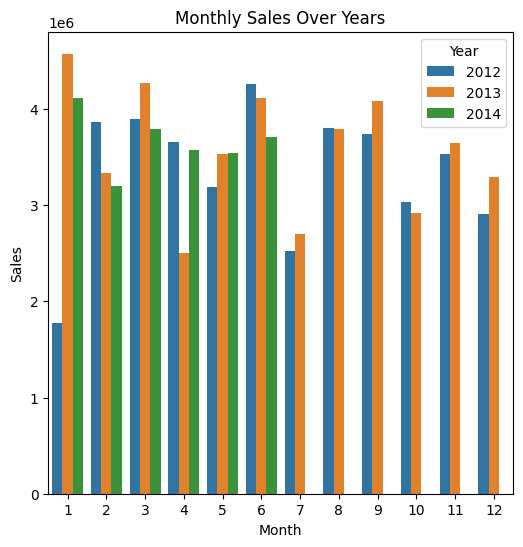

In [70]:
# Group by Year and Month and sum Sales.

sales_by_month = sales.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

plt.figure(figsize=(6, 6))
sns.barplot(data=sales_by_month, x='Month', y='Sales', hue='Year')
plt.title('Monthly Sales Over Years')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Year')
plt.show()


#Visualizations :Monthly Sales Over Years :

Insights:

Seasonal Sales Trends:

The barplot effectively showcases variations in sales for each month across multiple years, highlighting distinct seasonal trends. Notably, January, March, and June exhibit peak sales figures in 2013, indicating high-demand periods potentially due to seasonal demands or promotional events. Conversely, April and July show lower sales figures in 2013, suggesting periods with comparatively lower consumer activity or market trends.

Identifying Growth or Decline:

Differences in bar heights, especially for January, across different years, reveal growth in sales for 2013 and a subsequent decline in sales for 2014. These variations signify potential shifts in consumer behaviors or market changes, offering insights into evolving trends over the years.

Strategic Planning Insights:

Understanding these monthly sales patterns provides valuable strategic insights. It allows businesses to forecast high-demand periods, facilitating effective resource allocation, inventory planning, and targeted marketing strategies to capitalize on peak sales seasons and prepare for potential sales slumps.


Hypothesis: There is a seasonal effect on sales performance, with specific months consistently exhibiting higher sales across all years. It is expected that during specific months (Jan, March,June and July) shows a significant increase in sales compared to other months due to seasonal factors like vacations, outdoor activities, and increased consumer spending habits during this period."

Validating or disproving this hypothesis through data analysis could offer valuable insights into the seasonal impact on sales trends. If confirmed, businesses could strategically plan marketing campaigns, inventory management, and resource allocation to leverage these high-demand periods effectively. If disproven, it might prompt a reassessment of assumptions about consumer behavior.



# 2. Merge DataFrames to create a unified dataset merged_data for analysis.

In [71]:
#Merging sales data with item_master data.
merged_data = pd.merge(sales, item_master, on='Item Number', how='left')

#Merging merged_data with customers data.
merged_data = pd.merge(merged_data, customers, on='Customer Number', how='left')

#Merging merged_data with cities data.
merged_data = pd.merge(merged_data, cities, on='City Code', how='left')

#Merging merged_data with sales_rep data.
merged_data = pd.merge(merged_data, sales_rep, on='Sales Rep Number', how='left') # unified merged_data


In [72]:
merged_data.shape

(97221, 31)

In [73]:
print(merged_data.isnull().sum())

Percent_KEY               0
Cost                      0
Customer Number           0
Date                      0
GrossSales                0
Invoice Date              0
Invoice Number            0
Item Desc                 0
Item Number               0
Margin                    0
Order Number              0
Promised Delivery Date    0
Sales                     0
Sales Qty                 0
Sales Rep Number          0
Year                      0
Month                     0
Product Group             0
Product Line              0
Product Sub Group         0
Product Type              0
Customer                  0
City Code                 0
City                      0
Region                    0
Latitude                  0
Longitude                 0
Desc                      0
Manager                   0
Manager Number            0
Sales Rep Name            0
dtype: int64


In [74]:
merged_data.duplicated().sum()

0

In [75]:
print(merged_data.columns)

Index(['Percent_KEY', 'Cost', 'Customer Number', 'Date', 'GrossSales',
       'Invoice Date', 'Invoice Number', 'Item Desc', 'Item Number', 'Margin',
       'Order Number', 'Promised Delivery Date', 'Sales', 'Sales Qty',
       'Sales Rep Number', 'Year', 'Month', 'Product Group', 'Product Line',
       'Product Sub Group', 'Product Type', 'Customer', 'City Code', 'City',
       'Region', 'Latitude', 'Longitude', 'Desc', 'Manager', 'Manager Number',
       'Sales Rep Name'],
      dtype='object')


# 3.Visualization : Sales Distribution by Product Group.

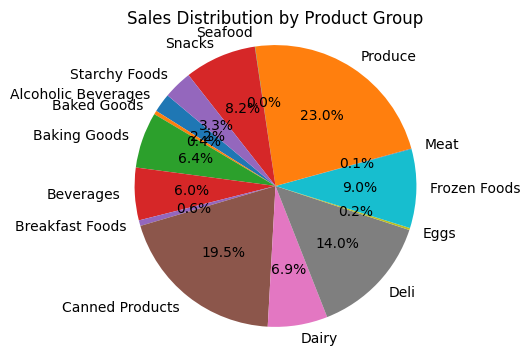

In [76]:
# Calculate total sales per product group

sales_by_group = merged_data.groupby('Product Group')['Sales'].sum()
plt.figure(figsize=(4, 4))
plt.pie(sales_by_group, labels=sales_by_group.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Product Group')
plt.axis('equal')
plt.show()


#Visualization: Sales Distribution by Product Group (Pie Chart)

Insights:

Proportion of Sales by Product Groups:

The pie chart illustrates the contribution of each product group to the total sales. Each segment of the pie represents a product group, and the size of each slice corresponds to the proportion of sales it contributes to the whole.

Identified Dominant Product Groups:

Larger segments like Produce is 23%,canned product is 19.5% ,Deli 14.0% are the product groups that contribute more significantly to total sales ogf 56.5%. These dominant product groups play a crucial role in driving overall revenue compared to smaller segments like seafood, meat, baked goods.

Produce group (including Fresh Vegetables and food items), contributing 23% of total sales, Canned Products (including food and tuna/canned tuna) constituting 19.5% of total sales, and Deli items (including food, hot dogs, and meats) contributing 14.0% of total sales, are expected to hold a substantial share of 56.5% of total sales.This high Sales Contribution and is relatively significant to take strategic decisions. Businesses can focus on marketing strategies, product development, or resource allocation based on the performance of these groups to maximize revenue.

"Hypothesis: The specified product groups, namely the Produce group contributing 23% of total sales, Canned Products constituting 19.5% of total sales, and Deli items contributing 14.0% of total sales, are expected to collectively account for 56.5% of the total sales, signifying their prominence in driving revenue compared to other product groups. This hypothesis anticipates the substantial combined contribution of these specified product categories to the total sales, indicating their prominence in driving revenue compared to other product groups.

This hypothesis highlights the expected dominance of particular product groups based on their individual percentages contributing to total sales. It implies an exploration into whether these specified product categories indeed hold substantial shares of sales compared to others, suggesting a higher impact on overall revenue generation. Validating or refuting this hypothesis through analysis would provide insights into the pivotal role of these specific product groups in driving overall sales performance.


# 4.Top 5 Sales Representatives with high sales in specific region.

Enter the region (Japan, Germany, Spain, Nordic, UK, USA): USA


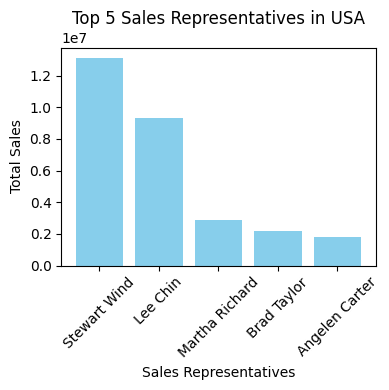

In [77]:
region_input = input("Enter the region (Japan, Germany, Spain, Nordic, UK, USA): ")

region_data = merged_data[merged_data['Region'] == region_input]
sales_by_rep = region_data.groupby('Sales Rep Name')['Sales'].sum().reset_index()
top_5_reps = sales_by_rep.nlargest(5, 'Sales')

plt.figure(figsize=(4, 4))
plt.bar(top_5_reps['Sales Rep Name'], top_5_reps['Sales'], color='skyblue')
plt.xlabel('Sales Representatives')
plt.ylabel('Total Sales')
plt.title(f'Top 5 Sales Representatives in {region_input}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#5.Top 5 Sales Representative across the globe with Highest Sales.

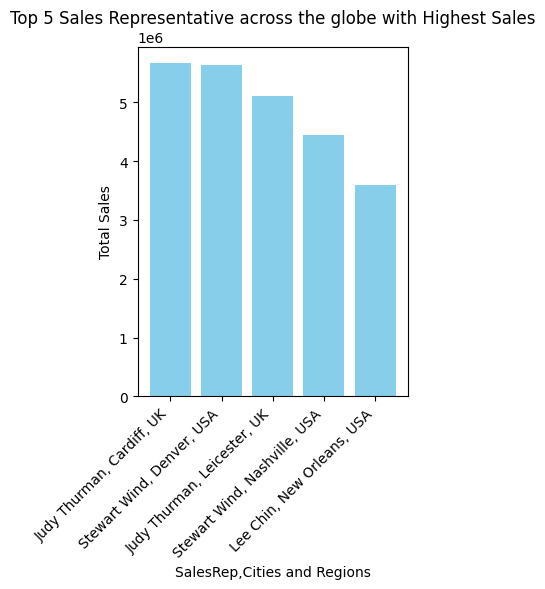

In [78]:

# Creating a new column by concatenating City and Region details
merged_data['SalesRep_City_Region'] = merged_data['Sales Rep Name'] + ', ' + merged_data['City'] + ', ' + merged_data['Region']

# Grouping the data by City_Region and calculating total sales for each
SalesRepp_city_region_sales = merged_data.groupby('SalesRep_City_Region')['Sales'].sum().reset_index()

# Sorting to get the top 5 cities with the highest sales
top_5_SalesRep_city_region = SalesRepp_city_region_sales.nlargest(5, 'Sales')

# Plotting the top 5 cities with the highest sales along with their regions
plt.figure(figsize=(4, 6))
plt.bar(top_5_SalesRep_city_region['SalesRep_City_Region'], top_5_SalesRep_city_region['Sales'], color='skyblue')
plt.xlabel('SalesRep,Cities and Regions')
plt.ylabel('Total Sales')
plt.title('Top 5 Sales Representative across the globe with Highest Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#6.Top 5 Cities with Highest Total Sales globally.

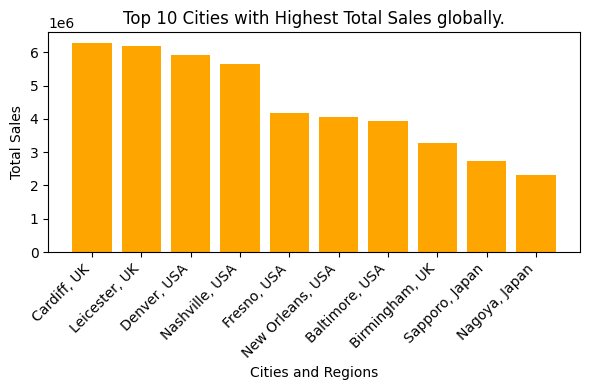

In [81]:
# Creating a new column by concatenating City and Region details
merged_data['City_Region'] = merged_data['City'] + ', ' + merged_data['Region']

# Grouping the data by City_Region and calculating total sales for each
city_region_sales = merged_data.groupby('City_Region')['Sales'].sum().reset_index()

# Sorting to get the top 10 cities with the highest sales
top_10_city_region = city_region_sales.nlargest(10, 'Sales')

# Plotting the top 10 cities with the highest sales along with their regions
plt.figure(figsize=(6, 4))
plt.bar(top_10_city_region['City_Region'], top_10_city_region['Sales'], color='orange')
plt.xlabel('Cities and Regions')
plt.ylabel('Total Sales')
plt.title('Top 10 Cities with Highest Total Sales globally.')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#7.Top Selling Product Groups in Terms of Margin

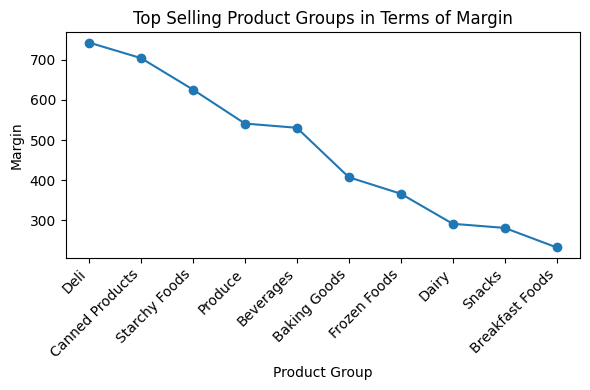

In [82]:
# Group by Product Group and calculate the mean margin for each group
group_margin = merged_data.groupby('Product Group')['Margin'].mean().reset_index()

# Sort by margin in descending order to get top selling product groups in terms of margin
top_margin_groups = group_margin.sort_values(by='Margin', ascending=False).head(10)

# Plotting the top selling product groups in terms of margin
plt.figure(figsize=(6, 4))
plt.plot(top_margin_groups['Product Group'], top_margin_groups['Margin'], marker='o')
plt.title('Top Selling Product Groups in Terms of Margin')
plt.xlabel('Product Group')
plt.ylabel('Margin')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# 8.Sales vs Margin

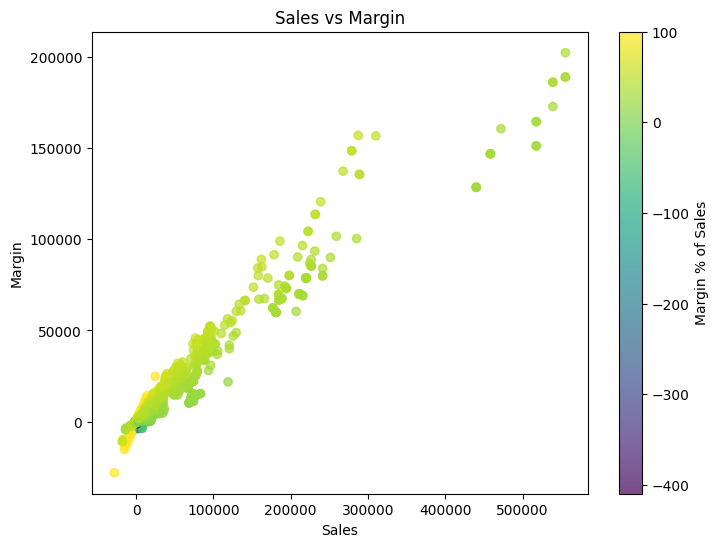

In [83]:
# Calculate the percentage of margin to sales.
merged_data['Margin_percentage'] = (merged_data['Margin'] / merged_data['Sales']) * 100

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['Sales'], merged_data['Margin'], c=merged_data['Margin_percentage'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Margin % of Sales')
plt.xlabel('Sales')
plt.ylabel('Margin')
plt.title('Sales vs Margin')
plt.show()


# Visualization: Scatter Plot - Sales vs. Margin with Color Encoding for Margin Percentage
Scatter Plot - Sales vs. Margin

Insight:
This scatter plot illustrates the relationship between sales and margins, with the color indicating the percentage of margin to sales.

Variability in Sales and Margin:
The scatter shows a spread of data points across different sales and margin values, indicating variability in margin despite varying sales amounts.

Insights from this visualization guide the business decisions. For example,  areas like sale range is high like at 300000 and there margin is low.Higher sales don't correspond to proportionate margins might suggest a need to revisit pricing strategies, cost management, or product mix for better profitability.